In [1]:
!git clone https://github.com/metrica-sports/sample-data

fatal: destination path 'sample-data' already exists and is not an empty directory.


In [2]:
import os
import pandas as pd
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import scipy.signal as signal


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

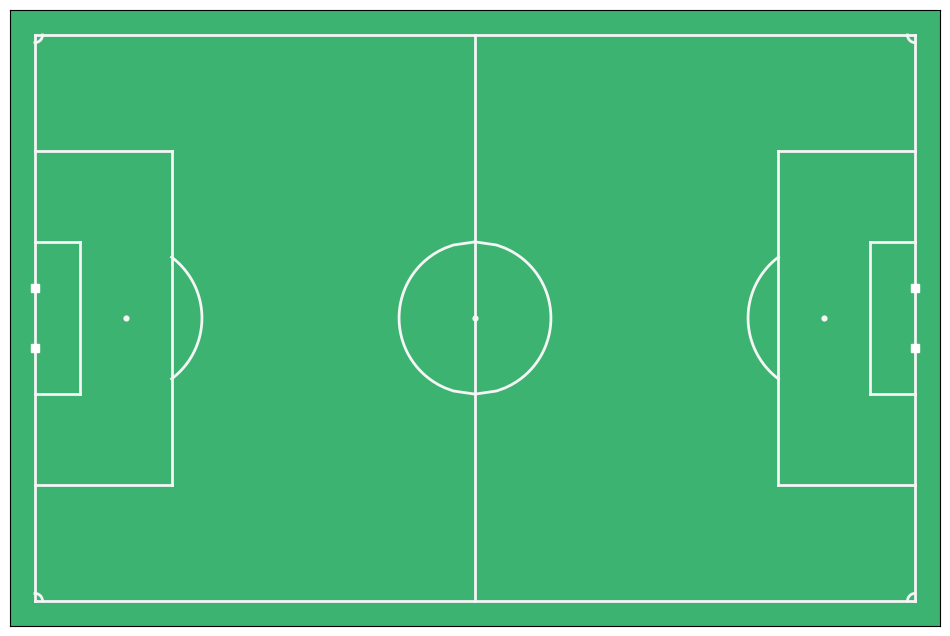

In [3]:
def plot_pitch(field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20):
    """ plot_pitch

    Plots a soccer pitch. All distance units converted to meters.

    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20

    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    fig,ax = plt.subplots(figsize=(12,8)) # create a figure
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1]
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)

    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax

plot_pitch()

# Metrica 이벤트 데이터

The [Metrica Sports](https://metrica-sports.com/) Events dataset has fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

In [4]:
def read_event_data(DATADIR,game_id):
    '''
    read_event_data(DATADIR,game_id):
    read Metrica event data  for game_id and return as a DataFrame
    '''
    eventfile = '/Sample_Game_%d/Sample_Game_%d_RawEventsData.csv' % (game_id,game_id) # filename
    events = pd.read_csv('{}/{}'.format(DATADIR, eventfile)) # read data
    return events

def to_metric_coordinates(data,field_dimen=(106.,68.) ):
    '''
    Convert positions from Metrica units to meters (with origin at centre circle)
    '''
    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = ( data[x_columns]-0.5 ) * field_dimen[0]
    data[y_columns] = -1 * ( data[y_columns]-0.5 ) * field_dimen[1]
    '''
    ------------ ***NOTE*** ------------
    Metrica actually define the origin at the *top*-left of the field, not the bottom-left, as discussed in the YouTube video.
    I've changed the line above to reflect this. It was originally:
    data[y_columns] = ( data[y_columns]-0.5 ) * field_dimen[1]
    ------------ ********** ------------
    '''
    return data

In [5]:
def plot_events( events, figax=None, field_dimen = (106.0,68), indicators = ['Marker','Arrow'], color='r', marker_style = 'o', alpha = 0.5, annotate=False):
    """ plot_events( events )

    Plots Metrica event positions on a football pitch. event data can be a single or several rows of a data frame. All distances should be in meters.

    Parameters
    -----------
        events: row (i.e. instant) of the home team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        indicators: List containing choices on how to plot the event. 'Marker' places a marker at the 'Start X/Y' location of the event; 'Arrow' draws an arrow from the start to end locations. Can choose one or both.
        color: color of indicator. Default is 'r' (red)
        marker_style: Marker type used to indicate the event position. Default is 'o' (filled ircle).
        alpha: alpha of event marker. Default is 0.5
        annotate: Boolean determining whether text annotation from event data 'Type' and 'From' fields is shown on plot. Default is False.

    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """

    if figax is None: # create new pitch
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax
    for i,row in events.iterrows():
        if 'Marker' in indicators:
            ax.plot(  row['Start X'], row['Start Y'], color+marker_style, alpha=alpha )
        if 'Arrow' in indicators:
            ax.annotate("", xy=row[['End X','End Y']], xytext=row[['Start X','Start Y']], alpha=alpha, arrowprops=dict(alpha=alpha,width=0.5,headlength=4.0,headwidth=4.0,color=color),annotation_clip=False)
        if annotate:
            textstring = row['Type'] + ': ' + row['From']
            ax.text( row['Start X'], row['Start Y'], textstring, fontsize=10, color=color)
    return fig,ax

In [6]:
DATADIR = './sample-data/data'
game_id = 2  # sample match 2

In [7]:
# Read in the event data - uses Metrica_IO library
events = read_event_data(DATADIR,game_id)
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [8]:
# See all the types and quantities of each event
events['Type'].value_counts()

,count
Type,
PASS,964
CHALLENGE,311
RECOVERY,248
BALL LOST,233
SET PIECE,80
BALL OUT,49
SHOT,24
FAULT RECEIVED,20
CARD,6


In [9]:
# Unit conversion from metric data units to meters
events = to_metric_coordinates(events)
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [10]:
# Create seperate Events DataFrames for each team
home_events = events[events['Team'] == 'Home']
away_events = events[events['Team'] == 'Away']

In [11]:
# Freqeuency of Events of the Home team
home_events['Type'].value_counts()

,count
Type,
PASS,543
CHALLENGE,160
RECOVERY,135
BALL LOST,120
SET PIECE,34
BALL OUT,27
SHOT,13
FAULT RECEIVED,9
CARD,3


In [12]:
# Freqeuency of Events of the Away team
away_events['Type'].value_counts()

,count
Type,
PASS,421
CHALLENGE,151
BALL LOST,113
RECOVERY,113
SET PIECE,46
BALL OUT,22
SHOT,11
FAULT RECEIVED,11
CARD,3


In [13]:
## Create a (all) Shots DataFrame
shots = events[events['Type'] == "SHOT"]

## Create a Home Shots DataFrame
home_shots = home_events[home_events.Type == "SHOT"]

## Create a Home Shots DataFrame
away_shots = away_events[away_events.Type == "SHOT"]

In [14]:
# Frequency of Events for Home Shots DataFrame
home_shots['Subtype'].value_counts()

,count
Subtype,
ON TARGET-SAVED,4
HEAD-OFF TARGET-OUT,4
OFF TARGET-OUT,2
ON TARGET-GOAL,2
HEAD-ON TARGET-GOAL,1


In [15]:
# Frequency of Events for Away Shots DataFrame
away_shots['Subtype'].value_counts()

,count
Subtype,
OFF TARGET-OUT,3
BLOCKED,2
ON TARGET-GOAL,2
ON TARGET-SAVED,2
OFF TARGET-HEAD-OUT,1
HEAD-OFF TARGET-OUT,1


In [16]:
# Which player took Home Shots?
home_shots['From'].value_counts()

,count
From,
Player9,4
Player10,3
Player5,2
Player3,1
Player4,1
Player7,1
Player12,1


In [17]:
# Which player took Away Shots?
away_shots['From'].value_counts()

,count
From,
Player24,2
Player20,2
Player19,2
Player22,1
Player23,1
Player21,1
Player18,1
Player 26,1


In [18]:
# Get goals
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

Text(-47.7, -3.400000000000003, '')

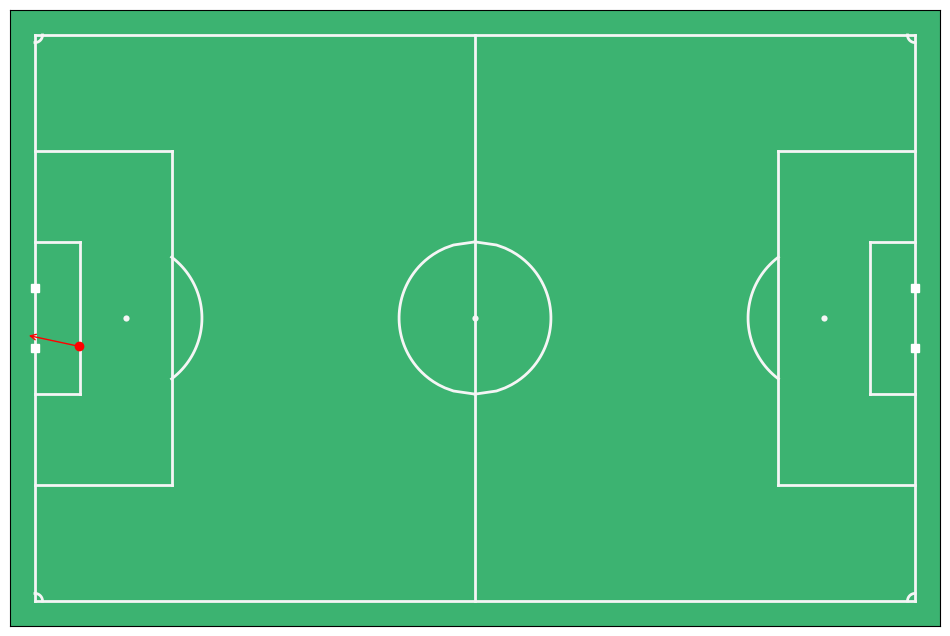

In [19]:
# Look at first goal - what happened?
# Plot shots - PLOTTEDR
fig, ax = plot_pitch()
ax.plot(events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro')
ax.annotate("", xy = events.loc[198][['End X','End Y']], xytext = events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops = dict(arrowstyle = "->", color='r'))

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

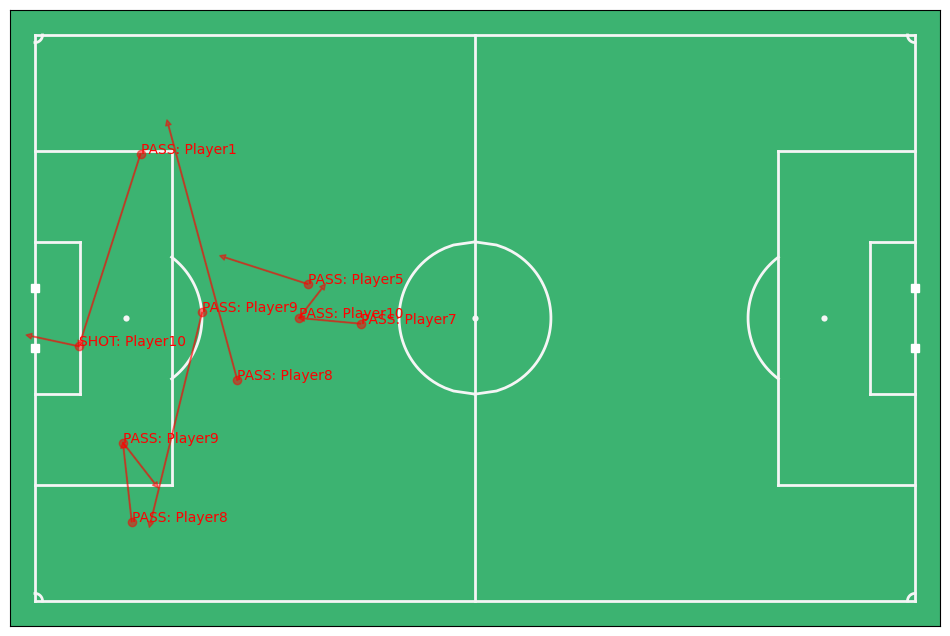

In [20]:
# Plot pass move in run up to goal
plot_events(events.loc[190:198], indicators = ['Marker', 'Arrow'], annotate=True)

### Metrica 트래킹 데이터

The [Metrica Sports](https://metrica-sports.com/) Tracking datasets have fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

In [21]:
def read_match_data(DATADIR,gameid):
    '''
    read_match_data(DATADIR,gameid):
    read all Metrica match data (tracking data for home & away teams, and ecvent data)
    '''
    tracking_home = tracking_data(DATADIR,gameid,'Home')
    tracking_away = tracking_data(DATADIR,gameid,'Away')
    events = read_event_data(DATADIR,gameid)
    return tracking_home,tracking_away,events

def tracking_data(DATADIR,game_id,teamname):
    '''
    tracking_data(DATADIR,game_id,teamname):
    read Metrica tracking data for game_id and return as a DataFrame.
    teamname is the name of the team in the filename. For the sample data this is either 'Home' or 'Away'.
    '''
    teamfile = '/Sample_Game_%d/Sample_Game_%d_RawTrackingData_%s_Team.csv' % (game_id,game_id,teamname)
    # First:  deal with file headers so that we can get the player names correct
    csvfile =  open('{}/{}'.format(DATADIR, teamfile), 'r') # create a csv file reader
    reader = csv.reader(csvfile)
    teamnamefull = next(reader)[3].lower()
    print("Reading team: %s" % teamnamefull)
    # construct column names
    jerseys = [x for x in next(reader) if x != ''] # extract player jersey numbers from second row
    columns = next(reader)
    for i, j in enumerate(jerseys): # create x & y position column headers for each player
        columns[i*2+3] = "{}_{}_x".format(teamname, j)
        columns[i*2+4] = "{}_{}_y".format(teamname, j)
    columns[-2] = "ball_x" # column headers for the x & y positions of the ball
    columns[-1] = "ball_y"
    # Second: read in tracking data and place into pandas Dataframe
    tracking = pd.read_csv('{}/{}'.format(DATADIR, teamfile), names=columns, index_col='Frame', skiprows=3)
    return tracking

def merge_tracking_data(home,away):
    '''
    merge home & away tracking data files into single data frame
    '''
    return home.drop(columns=['ball_x', 'ball_y']).merge( away, left_index=True, right_index=True )

def to_single_playing_direction(home,away,events):
    '''
    Flip coordinates in second half so that each team always shoots in the same direction through the match.
    '''
    for team in [home,away,events]:
        second_half_idx = team.Period.idxmax()
        columns = [c for c in team.columns if c[-1].lower() in ['x','y']]
        team.loc[second_half_idx:,columns] *= -1
    return home,away,events

In [22]:
def plot_frame( hometeam, awayteam, figax=None, team_colors=('r','b'), field_dimen = (106.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7, annotate=False ):
    """ plot_frame( hometeam, awayteam )

    Plots a frame of Metrica tracking data (player positions and the ball) on a football pitch. All distances should be in meters.

    Parameters
    -----------
        hometeam: row (i.e. instant) of the home team tracking data frame
        awayteam: row of the away team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)

    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    if figax is None: # create new pitch
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax # unpack tuple
    # plot home & away teams in order
    for team,color in zip( [hometeam,awayteam], team_colors) :
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
        ax.plot( team[x_columns], team[y_columns], color+'o', markersize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
        if include_player_velocities:
            vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
            vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
            ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
        if annotate:
            [ ax.text( team[x]+0.5, team[y]+0.5, x.split('_')[1], fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ]
    # plot ball
    ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', markersize=6, alpha=1.0, linewidth=0)
    return fig,ax

In [23]:
# Reading in tracking data
events = read_event_data(DATADIR, game_id)
events = to_metric_coordinates(events)

In [24]:
# Reading in tracking data
tracking_home = tracking_data(DATADIR, game_id, 'Home')
tracking_away = tracking_data(DATADIR, game_id, 'Away')

Reading team: home
Reading team: away


In [25]:
# Convert positions from metric units to meters
tracking_home = to_metric_coordinates(tracking_home)
tracking_away = to_metric_coordinates(tracking_away)

In [26]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,NaN,NaN
141153,2,5646.12,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09286,-30.34568,-23.31046,9.03176,NaN,NaN
141154,2,5646.16,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09074,-30.40348,-23.28714,9.02632,NaN,NaN


In [27]:
tracking_away

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,43.68366,1.14852,-1.03032,37.40000,-1.15434,3.54416,10.37528,-5.07824,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.33604,5.73104,NaN,NaN
141153,2,5646.12,43.66246,1.14852,-1.03032,37.40000,-1.17236,3.56252,10.35302,-5.10612,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.31802,5.74600,NaN,NaN
141154,2,5646.16,43.63808,1.14852,-1.03032,37.40000,-1.17872,3.61488,10.34878,-5.13400,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.30318,5.79020,NaN,NaN


In [28]:
# Reverse direction of a player so that home team is alway attacking right->left
tracking_home, tracking_away, events = to_single_playing_direction(tracking_home, tracking_away, events)

In [29]:
def calc_player_velocities(team, smoothing=True, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 12):
    """ calc_player_velocities( tracking_data )

    Calculate player velocities in x & y direciton, and total player speed at each timestamp of the tracking data

    Parameters
    -----------
        team: the tracking DataFrame for home or away team
        smoothing: boolean variable that determines whether velocity measures are smoothed. Default is True.
        filter: type of filter to use when smoothing the velocities. Default is Savitzky-Golay, which fits a polynomial of order 'polyorder' to the data within each window
        window: smoothing window size in # of frames
        polyorder: order of the polynomial for the Savitzky-Golay filter. Default is 1 - a linear fit to the velcoity, so gradient is the acceleration
        maxspeed: the maximum speed that a player can realisitically achieve (in meters/second). Speed measures that exceed maxspeed are tagged as outliers and set to NaN.

    Returrns
    -----------
       team : the tracking DataFrame with columns for speed in the x & y direction and total speed added

    """
    # remove any velocity data already in the dataframe
    team = remove_player_velocities(team)

    # Get the player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if c[:4] in ['Home','Away'] ] )

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['Time [s]'].diff()

    # index of first frame in second half
    second_half_idx = team.Period.idxmax()

    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt

        if maxspeed>0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_speed = np.sqrt( vx**2 + vy**2 )
            vx[ raw_speed>maxspeed ] = np.nan
            vy[ raw_speed>maxspeed ] = np.nan

        if smoothing:
            if filter_=='Savitzky-Golay':
                # calculate first half velocity
                vx.loc[:second_half_idx] = signal.savgol_filter(vx.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                vy.loc[:second_half_idx] = signal.savgol_filter(vy.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                # calculate second half velocity
                vx.loc[second_half_idx:] = signal.savgol_filter(vx.loc[second_half_idx:],window_length=window,polyorder=polyorder)
                vy.loc[second_half_idx:] = signal.savgol_filter(vy.loc[second_half_idx:],window_length=window,polyorder=polyorder)
            elif filter_=='moving average':
                ma_window = np.ones( window ) / window
                # calculate first half velocity
                vx.loc[:second_half_idx] = np.convolve( vx.loc[:second_half_idx] , ma_window, mode='same' )
                vy.loc[:second_half_idx] = np.convolve( vy.loc[:second_half_idx] , ma_window, mode='same' )
                # calculate second half velocity
                vx.loc[second_half_idx:] = np.convolve( vx.loc[second_half_idx:] , ma_window, mode='same' )
                vy.loc[second_half_idx:] = np.convolve( vy.loc[second_half_idx:] , ma_window, mode='same' )


        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )

    return team

def remove_player_velocities(team):
    # remove player velocoties and acceleeration measures that are already in the 'team' dataframe
    columns = [c for c in team.columns if c.split('_')[-1] in ['vx','vy','ax','ay','speed','acceleration']] # Get the player ids
    team = team.drop(columns=columns)
    return team

# Calculate player velocities
tracking_home = calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

In [30]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.407679,0.0,0.0,0.0,NaN,NaN,NaN,1.6430,0.578,1.741704
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.359875,0.0,0.0,0.0,NaN,NaN,NaN,1.6165,1.496,2.202519
141154,2,5646.16,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.252428,0.0,0.0,0.0,NaN,NaN,NaN,1.1395,2.278,2.547105


In [31]:
tracking_away

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,-43.68366,-1.14852,1.03032,-37.40000,1.15434,-3.54416,-10.37528,5.07824,...,0.0,0.0,0.0,0.0,1.1925,0.986,1.547337,-0.6360,-0.544,0.836918
141153,2,5646.12,-43.66246,-1.14852,1.03032,-37.40000,1.17236,-3.56252,-10.35302,5.10612,...,0.0,0.0,0.0,0.0,0.5300,0.000,0.530000,-0.4505,-0.374,0.585514
141154,2,5646.16,-43.63808,-1.14852,1.03032,-37.40000,1.17872,-3.61488,-10.34878,5.13400,...,0.0,0.0,0.0,0.0,0.6095,0.000,0.609500,-0.3710,-1.105,1.165618


In [32]:
home_player9_shots = events[(events['Team'] == "Home") & (events['Type'] == "SHOT") & (events['From'] == "Player9")]
home_player9_shots_goal = home_player9_shots[home_player9_shots['Subtype'].str.contains('-GOAL')]
home_player9_shots_goal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,-47.7,1.36,-54.06,2.04


In [33]:
goal_frame = home_player9_shots_goal['Start Frame']
goal_frame

,Start Frame
1118,73983


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

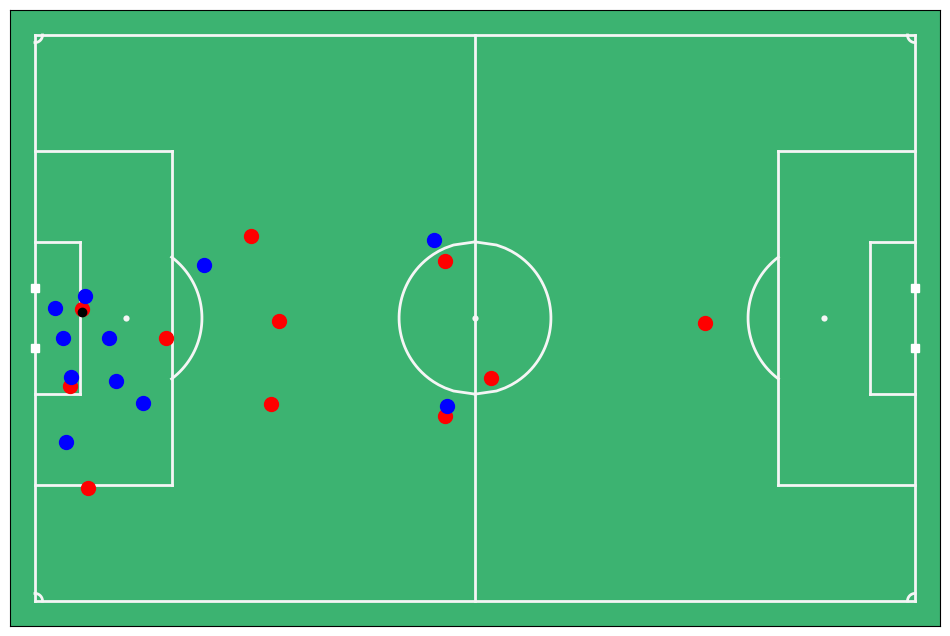

In [34]:
plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], PlayerAlpha = 1, include_player_velocities=False)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

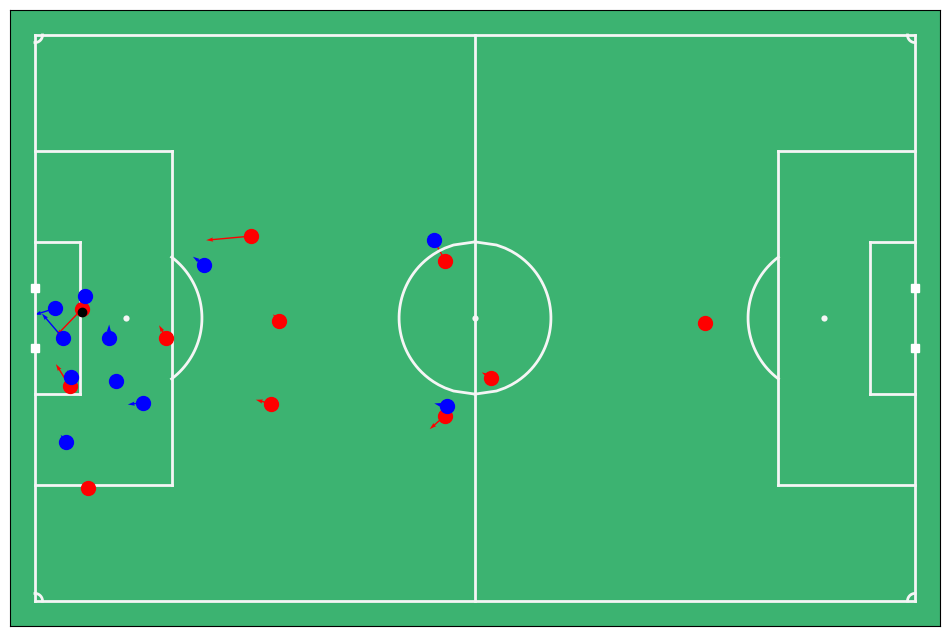

In [35]:
plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], PlayerAlpha = 1, include_player_velocities=True)

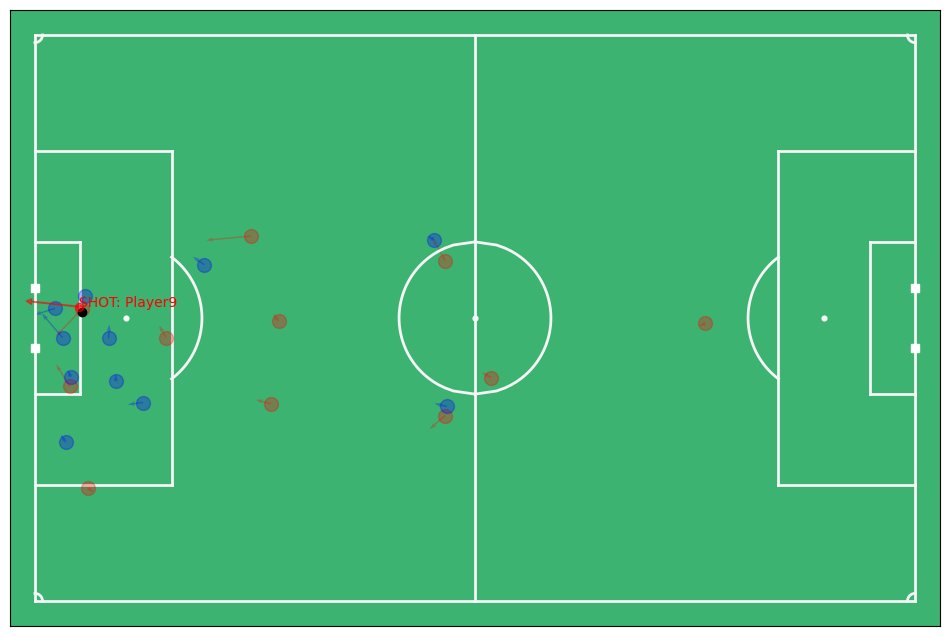

In [36]:
fig,ax = plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], PlayerAlpha = 0.3, include_player_velocities=True)
fig, ax = plot_events(home_player9_shots_goal, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate = True)

In [37]:
def save_match_clip(hometeam,awayteam, fpath, fname='clip_test', figax=None, frames_per_second=25, team_colors=('r','b'), field_dimen = (106.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7):
    """ save_match_clip( hometeam, awayteam, fpath )

    Generates a movie from Metrica tracking data, saving it in the 'fpath' directory with name 'fname'

    Parameters
    -----------
        hometeam: home team tracking data DataFrame. Movie will be created from all rows in the DataFrame
        awayteam: away team tracking data DataFrame. The indices *must* match those of the hometeam DataFrame
        fpath: directory to save the movie
        fname: movie filename. Default is 'clip_test.mp4'
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        frames_per_second: frames per second to assume when generating the movie. Default is 25.
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7

    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    # check that indices match first
    assert np.all( hometeam.index==awayteam.index ), "Home and away team Dataframe indices must be the same"
    # in which case use home team index
    index = hometeam.index
    # Set figure and movie settings
    FFMpegWriter = animation.writers['ffmpeg']
    metadata = dict(title='Tracking Data', artist='Matplotlib', comment='Metrica tracking data clip')
    writer = FFMpegWriter(fps=frames_per_second, metadata=metadata)
    fname = fpath + '/' +  fname + '.mp4' # path and filename
    # create football pitch
    if figax is None:
        fig,ax = plot_pitch(field_dimen=field_dimen)
    else:
        fig,ax = figax
    fig.set_tight_layout(True)
    # Generate movie
    print("Generating movie...",end='')
    with writer.saving(fig, fname, 100):
        for i in index:
            figobjs = [] # this is used to collect up all the axis objects so that they can be deleted after each iteration
            for team,color in zip( [hometeam.loc[i],awayteam.loc[i]], team_colors) :
                x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
                y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
                objs, = ax.plot( team[x_columns], team[y_columns], color+'o', markersize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
                figobjs.append(objs)
                if include_player_velocities:
                    vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
                    vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
                    objs = ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
                    figobjs.append(objs)
            # plot ball
            objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', markersize=6, alpha=1.0, linewidth=0)
            figobjs.append(objs)
            # include match time at the top
            frame_minute =  int( team['Time [s]']/60. )
            frame_second =  ( team['Time [s]']/60. - frame_minute ) * 60.
            timestring = "%d:%1.2f" % ( frame_minute, frame_second  )
            objs = ax.text(-2.5,field_dimen[1]/2.+1., timestring, fontsize=14 )
            figobjs.append(objs)
            writer.grab_frame()
            # Delete all axis objects (other than pitch lines) in preperation for next frame
            for figobj in figobjs:
                figobj.remove()
    print("done")
    plt.clf()
    plt.close(fig)

os.makedirs('./video', exist_ok=True)
save_match_clip(tracking_home.iloc[73600:73600+500], tracking_away.iloc[73600:73600+500],'./video', fname = 'home_goal_2', include_player_velocities = True)

Generating movie...done
